# **II. Programming and critical analysis** [7v]

Consider the following three regressors applied on kin8nm.arff data (available at the webpage):
- linear regression with Ridge regularization term of 0.1
- two MLPs – 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2 – each with two hidden layers of size 10, hyperbolic tangent function as the activation function of all nodes, a maximum of 500 iterations, and a fixed seed (random_state=0). 𝑀𝐿𝑃1 should be parameterized with early stopping while 𝑀𝐿𝑃2 should not consider early stopping. Remaining parameters (e.g., loss function, batch size, regularization term, solver) should be set as default.

Using a 70-30 training-test split with a fixed seed (random_state=0):

---

In [ ]:
# Import wall
from scipy.io.arff import loadarff

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# --------------------------------------------------------- #

# Load and prepare data.
data = loadarff('kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop("y", axis=1)
y = df['y']

# --------------------------------------------------------- #

# Creates the regression model we'll be using:
# - linear regression model with ridge regularization of 0.1.
reg_term = 0.1
ridge_regr = Ridge(alpha = reg_term)


# Creates the MLPs we'll be using:
# - two MLPs with 2 hidden layers of size 10, tanh as the activation function and max iterations of 500;
# - MLP1 has early stopping;
# - MLP2 doesn't have early stopping.
mlp_1 = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'tanh', max_iter = 500, early_stopping = True, random_state = 0)
mlp_2 = MLPRegressor(hidden_layer_sizes = (10, 10), activation = 'tanh', max_iter = 500, early_stopping = False, random_state = 0)


# Apply 70-30 training-testing split to our data.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)


# Fit the three regressors to our training data and apply regression
# to the test values.
ridge_regr.fit(X_train.values, y_train)
ridge_pred = ridge_regr.predict(X_test)

mlp_1.fit(X_train.values, y_train)
mlp_1_pred = mlp_1.predict(X_test)

mlp_2.fit(X_train.values, y_train)
mlp_2_pred = mlp_2.predict(X_test)


4. [4v] Compute the MAE of the three regressors: linear regression, 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2.

---

In [2]:
# Question 4:
# Compute the MAE of our three regressors.
MAE_ridge = mean_absolute_error(y_test, ridge_pred)
MAE_mlp_1 = mean_absolute_error(y_test, mlp_1_pred)
MAE_mlp_2 = mean_absolute_error(y_test, mlp_2_pred)

print("Linear regression / Ridge regularization (MAE): " + str(MAE_ridge) + "\n" \
      "MLP1 regression (MAE): " + str(MAE_mlp_1) + "\n" \
      "MLP2 regression (MAE): " + str(MAE_mlp_2) + "\n")

Linear regression / Ridge regularization (MAE): 0.162829976437694
MLP1 regression (MAE): 0.0680414073796843
MLP2 regression (MAE): 0.0978071820387748



5. [1.5v] Plot the residues (in absolute value) using two visualizations: boxplots and histograms. \
Hint: consider using boxplot and hist functions from matplotlib.pyplot to this end

---

Text(0.5, 1.0, 'MLP 2')

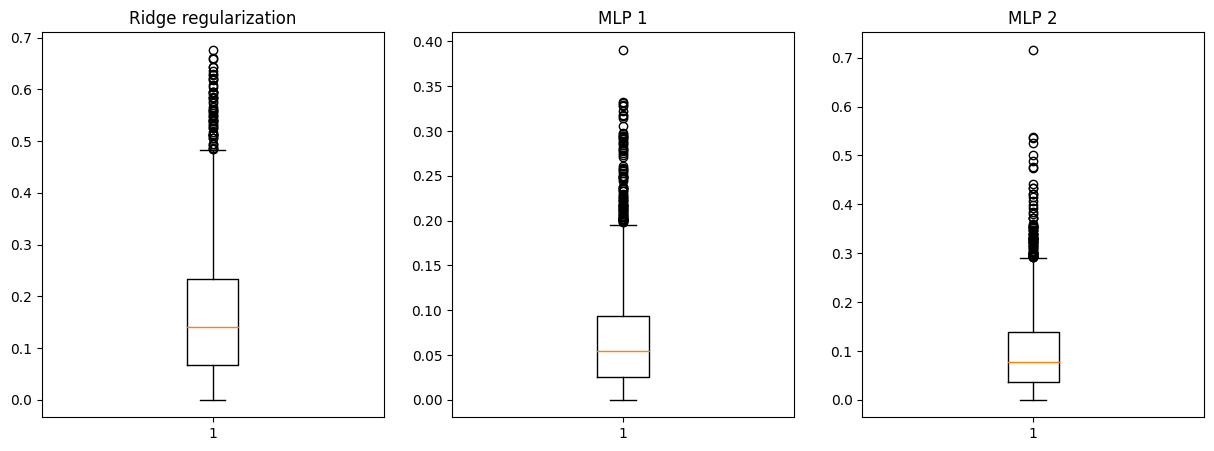

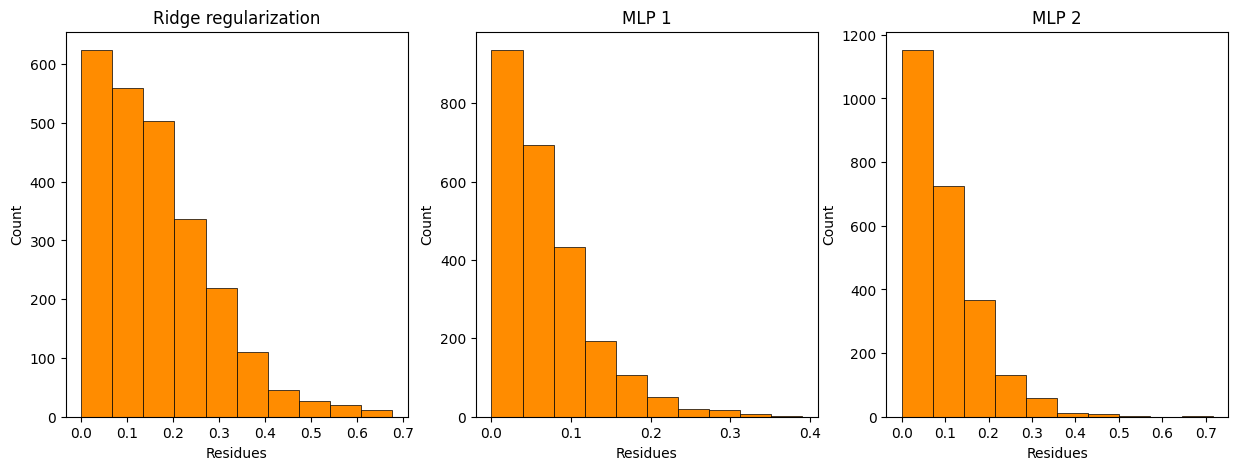

In [3]:

# Question 5:
# Get the residue arrays for our three regressors.
ridge_residues = np.absolute(np.subtract(y_test, ridge_pred))
mlp_1_residues = np.absolute(np.subtract(y_test, mlp_1_pred))
mlp_2_residues = np.absolute(np.subtract(y_test, mlp_2_pred))

data = {"Ridge regularization": ridge_residues, \
        "MLP 1": mlp_1_residues, \
        "MLP 2": mlp_2_residues}

# Boxplots.
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 5))

ax1.boxplot(ridge_residues)
ax1.set_title("Ridge regularization")

ax2.boxplot(mlp_1_residues)
ax2.set_title("MLP 1")

ax3.boxplot(mlp_2_residues)
ax3.set_title("MLP 2")


# Histograms.
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 5))

ax1.hist(ridge_residues, color = "darkorange", lw = 0.5, edgecolor = "black")
ax1.set_xlabel("Residues")
ax1.set_ylabel("Count")
ax1.set_title("Ridge regularization")

ax2.hist(mlp_1_residues, color = "darkorange", lw = 0.5, edgecolor = "black")
ax2.set_xlabel("Residues")
ax2.set_ylabel("Count")
ax2.set_title("MLP 1")

ax3.hist(mlp_2_residues, color = "darkorange", lw = 0.5, edgecolor = "black")
ax3.set_xlabel("Residues")
ax3.set_ylabel("Count")
ax3.set_title("MLP 2")


6. [1v] How many iterations were required for 𝑀𝐿𝑃1 and 𝑀𝐿𝑃2 to converge?

---

Text(0.5, 1.0, 'MLP 2 Loss curve')

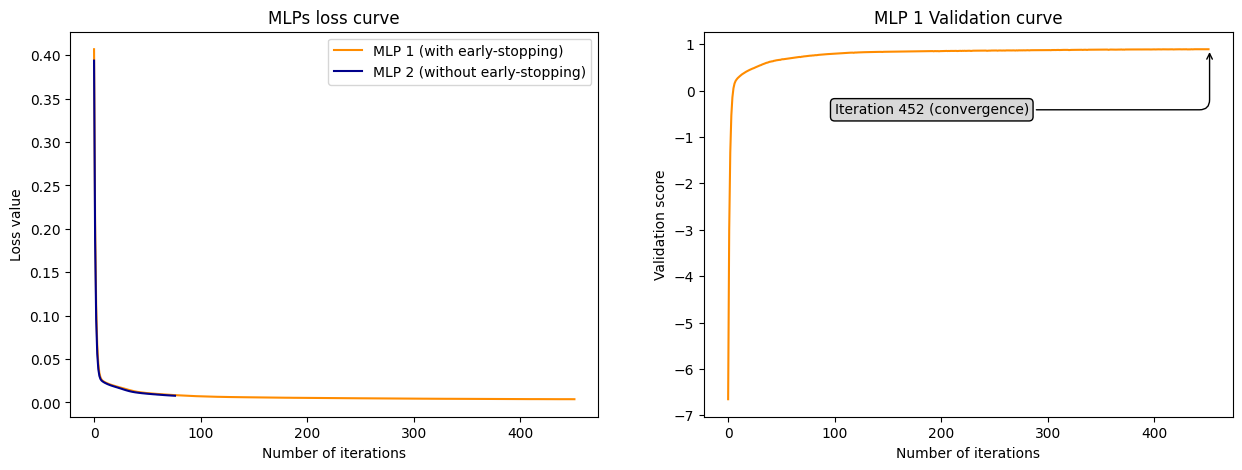

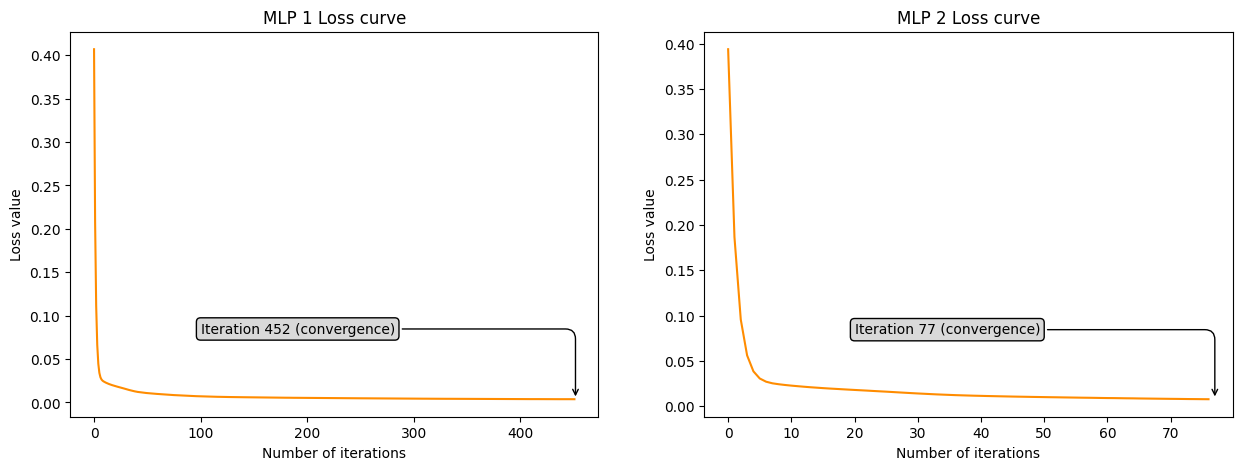

In [5]:

# Question 6:
# By adding the 'verbose' parameter to our MLP regressors:
# - MLPRegressor(..., verbose = 500)

# We get the following output:
'''
MLP1:
 - Iteration 452, loss = 0.00368074
   Validation score: 0.890847
   Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping

MLP2:
 - Iteration 77, loss = 0.00768966
   Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
'''

# And so:
# - takes 452 iterations for MLP1 to converge;
# - takes 77 iterations for MLP2 to converge.


# Loss function plots.

# ---------------------------------------------------- #
bbox = dict(boxstyle ="round", fc ="0.85")
arrowprops = dict(arrowstyle = "->", connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")
# ---------------------------------------------------- #


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(mlp_1.loss_curve_, label = "MLP 1 (with early-stopping)", color = "darkorange")
plt.plot(mlp_2.loss_curve_, label = "MLP 2 (without early-stopping)", color = "darkblue")
plt.legend(loc = "upper right")
plt.xlabel("Number of iterations")
plt.ylabel("Loss value")
plt.title("MLPs loss curve")

plt.subplot(122)
plt.plot(mlp_1.validation_scores_, color = "darkorange")
plt.annotate("Iteration 452 (convergence)", xy = (452, 0.890847), bbox = bbox, arrowprops = arrowprops, xytext =(100, -0.5))
plt.xlabel("Number of iterations")
plt.ylabel("Validation score")
plt.title("MLP 1 Validation curve")


plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(mlp_1.loss_curve_, color = "darkorange")
plt.annotate("Iteration 452 (convergence)", xy = (452, 0.00368074), bbox = bbox, arrowprops = arrowprops, xytext =(100, 0.08))
plt.xlabel("Number of iterations")
plt.ylabel("Loss value")
plt.title("MLP 1 Loss curve")

plt.subplot(122)
plt.plot(mlp_2.loss_curve_, color = "darkorange")
plt.annotate("Iteration 77 (convergence)", xy = (77, 0.00768966), bbox = bbox, arrowprops = arrowprops, xytext =(20, 0.08))
plt.xlabel("Number of iterations")
plt.ylabel("Loss value")
plt.title("MLP 2 Loss curve")


7. [1.5v] What can be motivating the unexpected differences on the number of iterations? \
Hypothesize one reason underlying the observed performance differences between the MLPs.

---

A razão para a enorme diferença no número de iterações até à convergência é claramente, haver, ou não, early stopping. \
Quando utilizamos early stopping, temos em consideração um conjunto de validação, que nos é útil de duas maneiras:
 - prevenir overfitting, ou seja, que o modelo se ajuste demasiado aos dados do conjunto de teste (evitando que o modelo tenha uma má performance quando consideramos outras observações que não as do conjunto de teste);
 - prevenir underfitting, ou seja, que o modelo termine a sua evolução cedo demais, levando-o a parar num mínimo local (devemos ter em conta que ambos os MLPs consideram "momentum" no processo de diminuição do erro, algo que, também ajuda a prevenir a paragem em mínimos locais).

Todo este processo de ter em conta um conjunto de validação vai levar a uma evolução do modelo muito mais controlada, contudo, a minimização do erro torna-se também bem mais prolongada, sendo por isso necessárias muitas mais iterações até à convergência do MLP1 (olhando para o gráfico do validation score do MLP1, podemos ter noção da sua evolução, paralela à do modelo). \
A conclusão acima, é reforçada pela análise dos gráficos da diminuição do erro de ambos os MLPs (Loss curves). Reparamos que para o MLP2 (sem early stopping), existe uma diminuição do erro um pouco mais acentuada, do que para o MLP1 (com early-stopping), no entanto, a convergência é atingida muito mais cedo no MLP2 (77 iterações), do que no MLP1 (452 iterações). \
Analisando ainda os MAEs de ambos os MLPs, reparamos num contraste em termos de performance. A maior rapidez a convergir tem claramente as suas desvantagens: o menor controlo nos critérios de convergência do modelo levam a um erro médio maior, ≈0.0978 para o MLP2, comparado com ≈0.0680 para o MLP1 (uma diferença considerável). 

Em suma, podemos afirmar que, por um lado, uma solução sem early-stopping é claramente mais rápida a convergir. Por outro, esta não terá uma performance tão boa quando comparada com uma que considere early-stopping, que, no entanto, torna mais lenta a convergência (para o caso estudado). \
Encontramos portanto as seguintes implicações:
 - convergência mais rápida --> maior erro médio (menor performance)
 - convergência mais demorada --> menor erro médio (maior performance)